In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib._color_data as mcd
from matplotlib.gridspec import GridSpec

In [2]:
fname = "Results_Binary_Erik_V10_NewOrder_20250213.xlsx"
df = pd.read_excel(fname, na_values=['nan'],converters={'New Number':str})
df

,New Number,Type,Number,Title,Word count,N copied,N Frame variables,Wetenschappelijk tijdschrift,Verwijzing ander onderzoek,Onderzoeksgebied,...,Noodzaak verder onderzoek,Wereldwijd,Regionaal,Lokaal,Laboratorium,Geanalyseerd Sample,Sample: Human,Sample: Inorganic material,Sample: Invertebrates,Sample: (Bio)plastic
0,NaN,Color,NaN,NaN,NaN,NaN,NaN,#70AD47,#FFC000,#00B0F0,...,#D60093,#1F4E78,#4472C4,#D9E1F2,#00B0F0,#ED7D31,#833C0C,#C65911,#F4B084,#FCE4D6
1,1,PR,6.00,"Caterpillar found to eat shopping bags, sugge",665.0,0.0,NaN,1,1,0,...,1,0,0,0,0,1,0,0,1,0
2,1.1,NaN,6.32,6.32,509.0,0.0,NaN,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,1.2,NaN,6.96,6.96,497.0,0.0,NaN,1,1,0,...,0,0,0,0,0,1,0,0,1,0
4,1.3,NaN,6.21,6.21,633.0,0.0,NaN,1,1,0,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,10.5,NaN,67.50,67.5,454.0,0.0,NaN,1,0,1,...,0,0,0,1,0,1,0,1,0,0
137,10.6,NaN,67.80,67.8,109.0,0.0,NaN,0,0,1,...,0,0,0,1,0,0,0,0,0,0
138,10.7,NaN,67.11,67.11,297.0,1.0,NaN,1,0,0,...,0,0,0,0,0,0,0,0,0,0
139,10.8,NaN,67.13,67.13,529.0,0.0,NaN,1,0,1,...,0,0,0,1,0,1,0,1,0,0


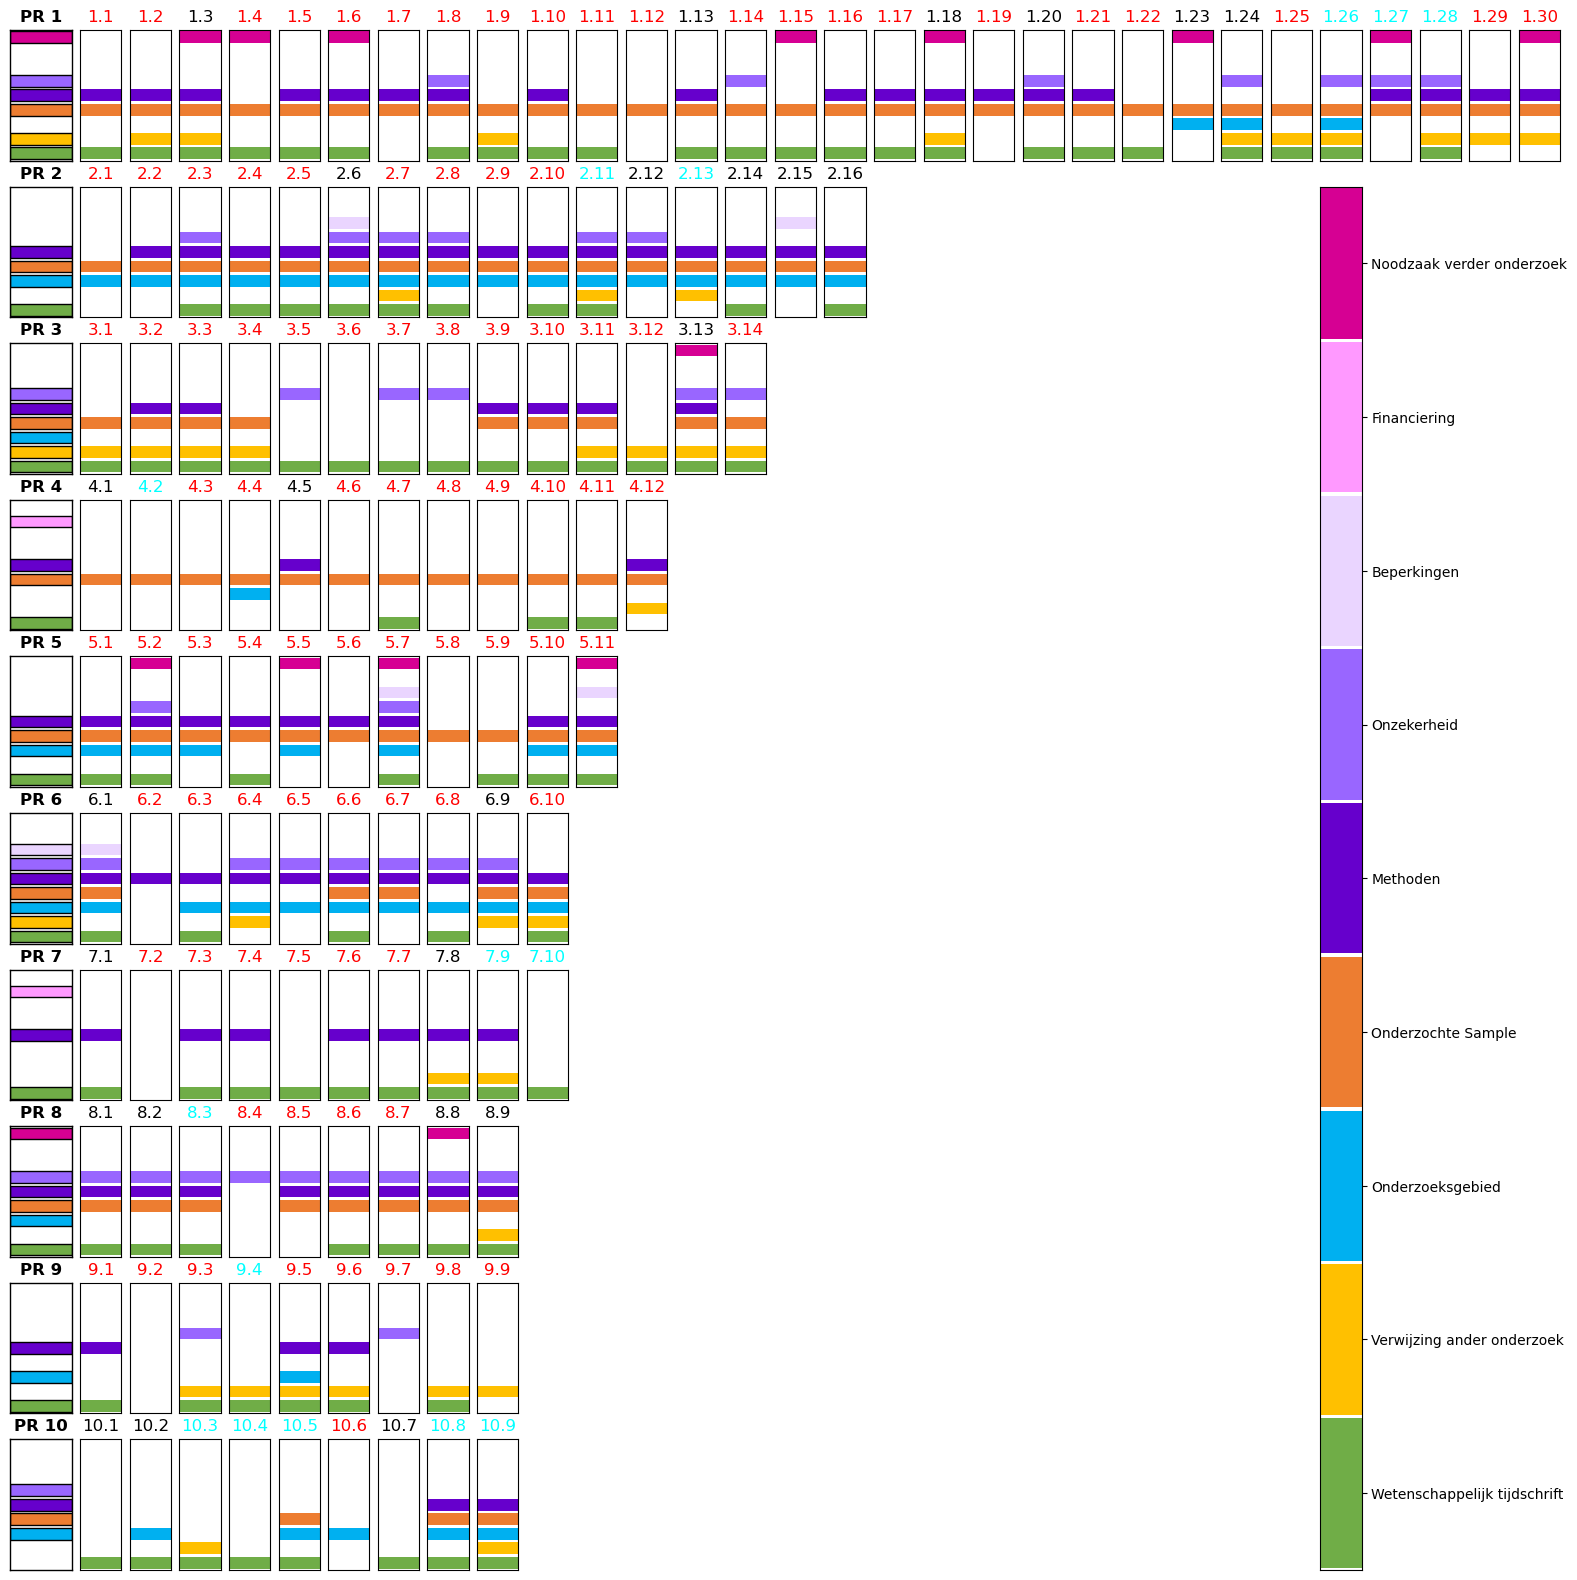

In [6]:
colors = df.iloc[0]
figcols = ['Wetenschappelijk tijdschrift',
           'Verwijzing ander onderzoek',
           'Onderzoeksgebied',
           'Onderzochte Sample',
           'Methoden',
           'Onzekerheid',
           'Beperkingen',
           'Financiering',
           'Noodzaak verder onderzoek']

change_factor_len = 20
change_factor_color_high = "cyan"
change_factor_color_low = "red"
legend = "vertical"
whiteline = 0.1

num_vars = len(figcols)
fig = plt.figure(figsize=(20, 20))
if legend == "horizontal":
    gs = GridSpec(31, 10, figure=fig)
elif legend == "vertical":
    widths = [1.5] + [1] * 30
    gs = GridSpec(10, 31, figure=fig, width_ratios=widths)
pr_num = -1
for index, row in df.iterrows():
    if isinstance(row["Type"], str) and "PR" in row["Type"]:  # Info about the PR itself
        PR = row
        pr_num += 1
        ai = fig.add_subplot(gs[pr_num, 0])
        ai.set_ylim(0, num_vars)
        ai.set_xlim(0, 1)
        ai.set_xticks([])
        ai.set_yticks([])

        frame_num = 0
        for name, values in row.items():
            if name in figcols:
                if values == 1:
                    rect = patches.Rectangle((0, frame_num+whiteline), 1, 1-2*whiteline, edgecolor='black', facecolor=colors[name])
                    ai.add_patch(rect)
                frame_num += 1
        ai.set_title(f"PR {int(row['New Number'])}", fontweight="bold")
        pr_len = row["Word count "]
        for axis in ['top','bottom','left','right']:
            ai.spines[axis].set_linewidth(1)

        article_num = 1  # reset article number counter

    elif row["Type"] not in ["Color"]:  # Info about the article
        ai = fig.add_subplot(gs[pr_num, article_num])
        ai.set_ylim(0, num_vars)
        ai.set_xlim(0, 1)
        ai.set_xticks([])
        ai.set_yticks([])

        frame_num = 0
        for name, values in row.items():
            if name in figcols:
                if values:
                    rect = patches.Rectangle((0, frame_num+whiteline), 1, 1-2*whiteline, edgecolor='none', facecolor=colors[name])
                    ai.add_patch(rect)
                frame_num += 1
        na_len = row["Word count "]
        if na_len/pr_len < 1-change_factor_len/100:
            fc = change_factor_color_low
        elif na_len/pr_len > 1+change_factor_len/100:
            fc = change_factor_color_high
        else:
            fc = "black"
        ai.set_title(row["New Number"], color=fc)
        article_num += 1

if legend == "horizontal":
    ax = fig.add_subplot(gs[-1, :])
    ax.set_xlim(0, num_vars)
    ax.set_ylim(0, 1)
    ax.set_xticks(np.arange(0.5, num_vars, 1))
    ax.set_yticks([])
    frame_num = 0
    for name, values in row.items():
        if name in figcols:
            rect = patches.Rectangle((frame_num, 0), 1, 1, edgecolor='none', facecolor=colors[name])
            ax.add_patch(rect)
            frame_num += 1
    ax.set_xticklabels([t.replace(': ', ':\n') for t in figcols], rotation=45, ha="right")
    text_x = 10
    text_y = [3, 2.5]

elif legend == "vertical":
    ax = fig.add_subplot(gs[1:, -5])
    ax.set_ylim(0, num_vars)
    ax.set_xlim(0, 1)
    ax.set_yticks(np.arange(0.5, num_vars, 1))
    ax.yaxis.tick_right()
    ax.set_xticks([])
    frame_num = 0
    for name, values in row.items():
        if name in figcols:
            rect = patches.Rectangle((0, frame_num+whiteline/9), 1, 1-2*whiteline/9, edgecolor='none', facecolor=colors[name])
            ax.add_patch(rect)
            frame_num += 1
    ax.set_yticklabels([t.replace(': ', ':\n').replace('caused by', 'caused\nby')
                        .replace('Treatment recommendation', 'Treatment\nrecommendation')
                        .replace('Local specific information', 'Local specific\ninformation') for t in figcols])

plt.show()
